Michael Abend, iMINT-Akademie Berlin
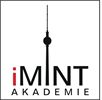

# Demokratie und Informatik -> Gerechtigkeit ?
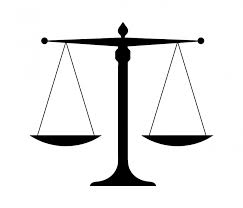
Eine Grundlage von Demokratie bildet die gerechte Verteilung von Resourcen innerhalb einer Gemeinschaft. Gruppen können Familien, Vereine, Parteien oder andere Organisationen einer Gesellschaft sein.
Einfache Verteilungsfragen können durch eine simple Division gerecht gelöst werden. Teste dies innerhalb der folgenden Python-Codezeilen durch Veränderung der Variablenwerte:

In [2]:
anzahl_gruppen = 4
resource = 100
verteilte_menge = resource / anzahl_gruppen
print (verteilte_menge)

25.0


Eine Besonderheit im Zusammenhang politischer Teilhabe bildet die Verteilung von Sitzen in parlamentarischen Gremien wie Gemeinderäten, Länderparlamenten oder dem Bundestag. Dort hat jeder wahlberechtigte Bürger eine Stimme und die Sitze sollen gerecht gemäß der Stimmenanteile an die Gruppierungen / Parteien verteilt werden, die sich zur Wahl gestellt haben.
Dabei ergibt sich ein Problem: 

In [3]:
parteien = ("Gruene","Linke","SPD","CDU","FDP","AFD")
stimmen = [5012, 4444, 2336, 5265, 2356, 4390]  # Beispielwerte -> diese kannst du durch Ergebnisse aus deinem Wahlkreis ersetzen
sitze = [0,0,0,0,0,0]
anzahl_sitze = [30]                   # Beispielwert
gesamtstimmen = 0
for i in range(0,len(stimmen)):
   gesamtstimmen += stimmen[i]
for i in range(0,len(stimmen)):
    sitze[i] = stimmen[i] * anzahl_sitze[0] / gesamtstimmen
    print (parteien[i], "=", sitze[i], "Sitze")

Gruene = 6.316850817123892 Sitze
Linke = 5.600974667058774 Sitze
SPD = 2.9441667016762594 Sitze
CDU = 6.635718186783179 Sitze
FDP = 2.9693736083686932 Sitze
AFD = 5.532916018989203 Sitze


Ein Sitz ist unteilbar! Was tun? Erster und wahrscheinlich gerechter Gedanke: aufrunden, bzw. abrunden. Also los...

In [4]:
for i in range(0,len(stimmen)):
    sitze[i] = round(stimmen[i] * anzahl_sitze[0] / gesamtstimmen)
    print (parteien[i], "=", sitze[i], "Sitze")

Gruene = 6 Sitze
Linke = 6 Sitze
SPD = 3 Sitze
CDU = 7 Sitze
FDP = 3 Sitze
AFD = 6 Sitze


Aber, stimmt nun die Gesamtanzahl der Sitze? Mal schauen:

In [5]:
summe = 0
for i in range(0,len(sitze)):
    summe += sitze[i]
print (summe)

31


Nein, das stimmt nicht! Und aufrunden ist auch ungerecht, denn die Partei hat ja gar nicht den Stimmanteil bekommen, um den aufgerundet wird. Also haben der englischen Mathematiker Thomas Hare
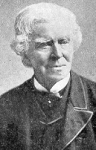
no copyright
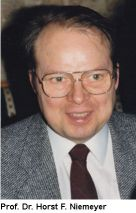
(c) www.online.uni-marburg.de/hrz/chronik/bilder/leitung-niemeyer.jpg <p>
und der deutsche Mathematikprofessor Horst F. Niemeyer folgendes Verfahren entwickelt. Schaue dir mal eine Erklärung bei Youtube an: https://www.youtube.com/watch?v=lEtjrySlQZU <p>
Hier findest du auch noch eine gute Erklärung: https://www.wahlrecht.de/verfahren/hare-niemeyer.html <p>
Dieses Verfahren kann man in Python so programmieren:

In [6]:
import math

def hare_niemeyer(liste_stimmen, sitze):
    # liste_stimmen -> Stimmen aller Parteien (Datentyp: Liste integer) 
    # sitze -> Anzahl der zu verteilenden Sitze (Datentyp: integer)
    
    summe_stimmen = sum(liste_stimmen);
    quoten = [float(stimmen)*sitze/summe_stimmen for stimmen in liste_stimmen]

    print ("Quoten: ", quoten)
    liste_nachkommastellen = []
    for (i, fp) in enumerate(quoten):
        liste_nachkommastellen.append((math.modf(fp)[0], i))  # Vor dem Sortieren: alte Indexposition merken! = Partei
        
    liste_nachkommastellen.sort()
    liste_nachkommastellen.reverse()

    print ("Nachkommastellen sortiert: ",liste_nachkommastellen)
    
    ergebnisse = [int(math.modf(quote)[1]) for quote in quoten]

    print ("Ergebnisse nach dem Abrunden = Grundverteilung: ", ergebnisse)
    
    restsitze = sitze - sum(ergebnisse)

    print ("Zu verteilende Restsitze: ", restsitze)
    
    for (nachkommastelle, i) in liste_nachkommastellen:
        ergebnisse[i] += 1
        restsitze -= 1
        if restsitze == 0: break
    
    print ( "Ergebnisse nach der Verteilung der Restsitze: ", ergebnisse)
    return ergebnisse   

# Test:
sitze = []
print ("Stimmenverteilung:", parteien[0],stimmen[0],parteien[1],stimmen[1],parteien[2],stimmen[2],parteien[3],stimmen[3],parteien[4],stimmen[4],parteien[5],stimmen[5])
print ("Anzahl der zu verteilenden Sitze: ", anzahl_sitze[0])
sitze = hare_niemeyer(stimmen, anzahl_sitze[0])

Stimmenverteilung: Gruene 5012 Linke 4444 SPD 2336 CDU 5265 FDP 2356 AFD 4390
Anzahl der zu verteilenden Sitze:  30
Quoten:  [6.316850817123892, 5.600974667058774, 2.9441667016762594, 6.635718186783179, 2.9693736083686932, 5.532916018989203]
Nachkommastellen sortiert:  [(0.9693736083686932, 4), (0.9441667016762594, 2), (0.6357181867831789, 3), (0.6009746670587743, 1), (0.5329160189892033, 5), (0.31685081712389174, 0)]
Ergebnisse nach dem Abrunden = Grundverteilung:  [6, 5, 2, 6, 2, 5]
Zu verteilende Restsitze:  4
Ergebnisse nach der Verteilung der Restsitze:  [6, 6, 3, 7, 3, 5]


Etwas anschaulicher wird es, wenn wir die Sitzverteilung statt als nackte Zahlen mit einer Tortengrafik darstellen. Hierbei hilft uns eine Softwarebibliothek namens 'matplotlib'. Das ist ein zusammengesetzter Kunstname, der aus den Wörten 'Mathematik', 'to plot = engl. darstellen' und 'library = engl. Bibliothek' gebildet wurde. Diese Bibliothek beinhaltet Eigenschaften (z.B. 'style') und Methoden (z.B. 'show'). Im Code wird ein Objekt mit dem Objektnamen 'plt' erzeugt und diesem die Bezeichnungen der Parteien (labels) und die Sitzanzahlen (sitze) übergeben. 

In [7]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-bright') #Aussehen der matplotlib-Grafik

farben = ['lightgreen', 'red', 'orange', 'lightblue', 'yellow', 'purple']

def make_autopct(values):                   # Eine notwendige Umdefinition der automatischen Prozentanzeige, damit
    def my_autopct(pct):                    # die ganzzahlige Sitzanzahl im Inneren der Tortenstuecke angezeigt wird.
        total = sum(values)
        val = int(round(pct*total/100.0))
        return 'Sitze: {v:d}'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=plt.figaspect(2))

plt.pie(sitze,              # Daten
        labels = parteien,  # Bezeichnungen
        colors = farben,    # Farben
        autopct= make_autopct(sitze), # Werte in den Tortenstücken
        shadow=True,        # Schatten eingeschaltet
        startangle=0)       # Startwinkel

plt.axis('equal')

plt.show()

<Figure size 400x800 with 1 Axes>

Nun wollen wir mit verschiedenen Stimmanteilen und Sitzanzahlen experimentieren. Dazu wird eine weitere Bibliothek namens 'ipwidgets' importiert. Sie stellt uns Einstellregler für die entsprechenden Variablen zur Verfügung. Die eingestellten Werte stehen dann im Arbeitsspeicher unseres Cloudcomputers sofort zur Verfügung und können in einer anderen Python-Zelle des Jupyter-Notebooks verwendet werden, z.B. zum Berechnen und Zeichnen anderer Sitzverteilungen.  

In [8]:
# Um die sogenannten 'widgets' (dt. = Komponente einer Benutzeroberfläche - GUI) nutzen zu können,
# müssen die folgenden iPython-Klassenbibliotheken eingebunden werden.
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [9]:
# Die folgenden Zeilen dienen der interaktiven Eingabe der Stimmanteile.
a = widgets.IntSlider(description='Gruene', orientation='vertical', min=0, max=5000, value=100)
b = widgets.IntSlider(description='Linke',  orientation='vertical', min=0, max=5000, value=100)
c = widgets.IntSlider(description='SPD',    orientation='vertical', min=0, max=5000, value=100)
d = widgets.IntSlider(description='CDU',    orientation='vertical', min=0, max=5000, value=100)
e = widgets.IntSlider(description='FDP',    orientation='vertical', min=0, max=5000, value=100)
g = widgets.IntSlider(description='AFD',    orientation='vertical', min=0, max=5000, value=100)
h = widgets.IntSlider(description='Sitze',  orientation='vertical', min=0, max=100, value=30)
ui = widgets.HBox([a, b, c, d, e, g, h])
def f(a, b, c, d, e, g, h):
    stimmen[0] = a
    stimmen[1] = b
    stimmen[2] = c
    stimmen[3] = d
    stimmen[4] = e
    stimmen[5] = g
    anzahl_sitze[0] = h
    print((a, b, c, d, e, g, h))
    
out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'g': g, 'h': h})

display(ui, out)

Output()

Aufgabe 1: <p>
Stelle nun unterschiedliche Stimmenverteilungen mit den Reglern ein und beobachte die Sitzverteilungen. Führe hierzu die Codeabschnitte zum Hare-Niemeyer-Verfahren und anschließend die Grafikausgabe jeweils erneut durch Drücken auf 'Run' aus.

Aufgabe 2: <p>
Recherchiere zu den Stichworten: <p>
    'Alabama-Paradox', 'New-State-Paradox' und 'Population-Paradox'. <p>
Versuche diese Paradoxien mit simulierten Werten in den obigen Codeabschnitten nachzuvollziehen.

Aufgabe 3: <p>
Diskutiere mit deinen Mitschülern über die Vorteile und Nachteile des Hare-Niemeyer-Sitzzuteilungsverfahrens.

Information: 
Nach diesem Verfahren wurde zwischen 1987 und 2005 die Sitzzuteilung im deutschen Bundestag durchgeführt.